<a href="https://colab.research.google.com/github/RafaExMachina/RafaExMachina/blob/main/GeoV6_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express


#C:\ProgramData\radioconda\python.exe

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 19 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,841 kB/s)
Selecting previously unselected

In [2]:
!pip install geopandas
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 17.4 MB/s 
     |████████████████████████████████| 6.3 MB 14.3 MB/s 
     |████████████████████████████████| 16.7 MB 290 kB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Brazil=gpd.read_file('/content/drive/MyDrive/BR_Municipios_2019.shp')

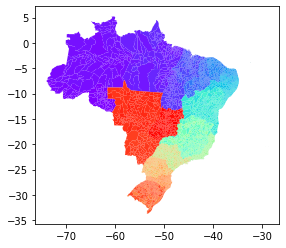

In [6]:
fig,ax = plt.subplots()
Brazil.plot(ax=ax,cmap='rainbow')

In [7]:
Cobertura=gpd.read_file('/content/drive/MyDrive/NLHD_3.shp')

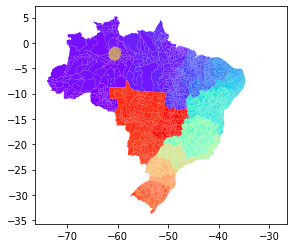

In [8]:
fig,ax = plt.subplots()
Brazil.plot(ax=ax,cmap='rainbow')
Cobertura[Cobertura['Name']=='[C12]'].plot(ax=ax, facecolor='yellow',alpha=0.55)# C12 Manaus

In [9]:
dfs = pd.read_excel('/content/drive/MyDrive/SAT output- Brazil_v01.xlsm', sheet_name='Relações Cidade - Igor',header=2)
dfs.head()

,CÓDIGO IBGE,UF,CIDADE,CIDADE-UF,Domicilios Total,População (IBGE 2017),Latitude,Longitude,Ponto SAT,Star One D2 posição orbital 70° Oeste,...,75cm,90cm,150cm,60cm .1,75cm .1,90cm .1,150cm.1,"Menor Antena com 99,5 %",Tamanho alterado?,Unnamed: 23
0,3550308,SP,SAO PAULO,SAO PAULO-SP,4004056,12106920,-23.54,-46.63,NaN,60,...,99.989819,99.993588,99.997898,9.964965,11.701092,12.975099,15.769935,60 cm,Manteve,From 60 cm to 60 cm
1,3304557,RJ,RIO DE JANEIRO,RIO DE JANEIRO-RJ,2285221,6520266,-22.9,-43.2,NaN,60,...,99.991350,99.994681,99.998335,9.985848,11.720880,12.993753,15.784566,60 cm,Manteve,From 60 cm to 60 cm
2,5300108,DF,BRASILIA,BRASILIA-DF,853849,3039444,-15.78,-47.93,NaN,60,...,99.971018,99.982875,99.995022,7.887977,9.711196,11.077184,14.215502,60 cm,Manteve,From 60 cm to 60 cm
3,2927408,BA,SALVADOR,SALVADOR-BA,996110,2953986,-12.97,-38.51,NaN,60,...,99.966236,99.979858,99.994095,8.241510,10.052576,11.405500,14.492888,60 cm,Manteve,From 60 cm to 60 cm
4,2304400,CE,FORTALEZA,FORTALEZA-CE,789498,2627482,-3.71,-38.54,NaN,60,...,99.948723,99.970354,99.992456,7.998089,9.817617,11.179628,14.302365,60 cm,Manteve,From 60 cm to 60 cm


In [10]:
#Aqui mudei o nome da primeira coluna de Brazil para poder fazer o "merge"
new_columns = Brazil.columns.values;  new_columns[0] = 'CÓDIGO IBGE'; Brazil.columns  = new_columns
#j=Brazil.columns
#print(j)
#Aqui converti de numpy para str (Para poder fazer o 'merge')
dfs['CÓDIGO IBGE']= dfs['CÓDIGO IBGE'].astype(str)

In [11]:
#fusão dos dataframes
Brazil_Antena=Brazil.merge(dfs, how='left', on='CÓDIGO IBGE')
Brazil_Antena.head()

,CÓDIGO IBGE,NM_MUN,SIGLA_UF,AREA_KM2,geometry,UF,CIDADE,CIDADE-UF,Domicilios Total,População (IBGE 2017),...,75cm,90cm,150cm,60cm .1,75cm .1,90cm .1,150cm.1,"Menor Antena com 99,5 %",Tamanho alterado?,Unnamed: 23
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8...",RO,ALTA FLORESTA D'OESTE,ALTA FLORESTA D'OESTE-RO,4697.0,25437.0,...,98.913384,99.433472,99.858436,0.082883,2.028258,3.529912,7.246245,150 cm,Manteve,From 150 cm to 150 cm
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...",RO,ARIQUEMES,ARIQUEMES-RO,27361.0,107345.0,...,99.587043,99.762512,99.934058,2.594332,4.520590,6.000475,9.617445,75 cm,Mudou,From 90 cm to 75 cm
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",RO,CABIXI,CABIXI-RO,935.0,6224.0,...,97.490957,99.190687,99.815003,-0.832602,1.117426,2.624410,6.365497,150 cm,Manteve,From 150 cm to 150 cm
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2...",RO,CACOAL,CACOAL-RO,22343.0,88507.0,...,98.695859,99.368652,99.840241,-0.078166,1.868100,3.370774,7.091828,150 cm,Manteve,From 150 cm to 150 cm
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2...",RO,CEREJEIRAS,CEREJEIRAS-RO,5039.0,17934.0,...,96.742140,99.111991,99.799796,-1.035704,0.915231,2.423255,6.169193,150 cm,Manteve,From 150 cm to 150 cm


In [12]:
Anatel = pd.read_csv("/content/drive/MyDrive/Acessos_TV_Assinatura.csv",sep = ';', encoding = 'utf-8',header=0,low_memory=False)
Anatel.head()

,Ano,Mês,Grupo Econômico,Empresa,CNPJ,Porte da Prestadora,UF,Município,Código IBGE Município,Tecnologia,Meio de Acesso,Tipo de Pessoa,Tipo Acesso TV,Acessos
0,2022,6,TELECOM AMERICAS,CLARO,9132659000176,Grande Porte,SP,Guaiçara,3517208,DTH,Satélite,Pessoa Jurídica,Padrão,1
1,2022,6,TELECOM AMERICAS,CLARO,9132659000176,Grande Porte,TO,Ananás,1701002,DTH,Satélite,Pessoa Jurídica,Padrão,2
2,2022,6,TELECOM AMERICAS,CLARO,9132659000176,Grande Porte,SP,Guarulhos,3518800,DTH,Satélite,Pessoa Jurídica,Padrão,27
3,2022,6,TELECOM AMERICAS,CLARO,9132659000176,Grande Porte,PB,Mulungu,2509800,DTH,Satélite,Pessoa Jurídica,Padrão,3
4,2022,6,TELECOM AMERICAS,CLARO,9132659000176,Grande Porte,BA,Camacan,2905602,DTH,Satélite,Pessoa Jurídica,Padrão,8


In [13]:
Anatel_Ajuste=Anatel[(Anatel['Empresa']=='SKY/AT&T') & (Anatel['Ano']==2022 ) & (Anatel['Mês']==6 ) & (Anatel['Tipo de Pessoa']=='Pessoa Física') & (Anatel['Tipo Acesso TV']=='Padrão')].reset_index()
Anatel_Ajuste.head()

,index,Ano,Mês,Grupo Econômico,Empresa,CNPJ,Porte da Prestadora,UF,Município,Código IBGE Município,Tecnologia,Meio de Acesso,Tipo de Pessoa,Tipo Acesso TV,Acessos
0,20177,2022,6,SKY/AT&T,SKY/AT&T,497373000110,Grande Porte,SC,Tubarão,4218707,DTH,Satélite,Pessoa Física,Padrão,1180
1,22435,2022,6,SKY/AT&T,SKY/AT&T,497373000110,Grande Porte,PI,Curimatá,2203206,DTH,Satélite,Pessoa Física,Padrão,441
2,22436,2022,6,SKY/AT&T,SKY/AT&T,497373000110,Grande Porte,MA,Palmeirândia,2107605,DTH,Satélite,Pessoa Física,Padrão,542
3,22437,2022,6,SKY/AT&T,SKY/AT&T,497373000110,Grande Porte,PR,Bocaiúva do Sul,4103107,DTH,Satélite,Pessoa Física,Padrão,395
4,22438,2022,6,SKY/AT&T,SKY/AT&T,497373000110,Grande Porte,AL,Inhapi,2703304,DTH,Satélite,Pessoa Física,Padrão,342


In [14]:
Lista_drop_colunas=['index','Ano','Mês','Grupo Econômico','Empresa','CNPJ','Porte da Prestadora','UF','Tecnologia','Meio de Acesso','Tipo de Pessoa','Município','Tipo Acesso TV']
Anatel_Ajuste=Anatel_Ajuste.drop(Lista_drop_colunas, axis=1)
Anatel_Ajuste.head()

,Código IBGE Município,Acessos
0,4218707,1180
1,2203206,441
2,2107605,542
3,4103107,395
4,2703304,342


In [15]:
Anatel_Ajuste.rename(columns = {'Código IBGE Município':'CÓDIGO IBGE'}, inplace = True)

In [16]:
Anatel_Ajuste.head()

,CÓDIGO IBGE,Acessos
0,4218707,1180
1,2203206,441
2,2107605,542
3,4103107,395
4,2703304,342


In [17]:
#Convertendo para str o coluna 'CÓDIGO IBGE' de Anatel_Ajuste para poder fazer o merge

Anatel_Ajuste['CÓDIGO IBGE']=Anatel_Ajuste['CÓDIGO IBGE'].astype(str)

Brazil_Antena_Assinantes=Brazil_Antena.merge(Anatel_Ajuste, how='left', on='CÓDIGO IBGE')
Brazil_Antena_Assinantes.head()

#type(Brazil_Antena['CÓDIGO IBGE'][0])

,CÓDIGO IBGE,NM_MUN,SIGLA_UF,AREA_KM2,geometry,UF,CIDADE,CIDADE-UF,Domicilios Total,População (IBGE 2017),...,90cm,150cm,60cm .1,75cm .1,90cm .1,150cm.1,"Menor Antena com 99,5 %",Tamanho alterado?,Unnamed: 23,Acessos
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8...",RO,ALTA FLORESTA D'OESTE,ALTA FLORESTA D'OESTE-RO,4697.0,25437.0,...,99.433472,99.858436,0.082883,2.028258,3.529912,7.246245,150 cm,Manteve,From 150 cm to 150 cm,46.0
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...",RO,ARIQUEMES,ARIQUEMES-RO,27361.0,107345.0,...,99.762512,99.934058,2.594332,4.520590,6.000475,9.617445,75 cm,Mudou,From 90 cm to 75 cm,509.0
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",RO,CABIXI,CABIXI-RO,935.0,6224.0,...,99.190687,99.815003,-0.832602,1.117426,2.624410,6.365497,150 cm,Manteve,From 150 cm to 150 cm,8.0
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2...",RO,CACOAL,CACOAL-RO,22343.0,88507.0,...,99.368652,99.840241,-0.078166,1.868100,3.370774,7.091828,150 cm,Manteve,From 150 cm to 150 cm,448.0
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2...",RO,CEREJEIRAS,CEREJEIRAS-RO,5039.0,17934.0,...,99.111991,99.799796,-1.035704,0.915231,2.423255,6.169193,150 cm,Manteve,From 150 cm to 150 cm,58.0


In [18]:

Tv_RO=gpd.read_file('/content/drive/MyDrive/municSky_TVRO_jun22.json')
Tv_RO.head()

,id,name,description,UF,antena,grupo,nova_antena,geometry
0,1100015,Alta Floresta D'Oeste,Alta Floresta D'Oeste,RO,150CM,2.0,150 cm,"POLYGON ((-62.18209 -11.86686, -62.16230 -11.8..."
1,1100023,Ariquemes,Ariquemes,RO,90CM,2.0,75 cm,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754..."
2,1100031,Cabixi,Cabixi,RO,150CM,2.0,150 cm,"POLYGON ((-60.39940 -13.45584, -60.40195 -13.4..."
3,1100049,Cacoal,Cacoal,RO,150CM,2.0,150 cm,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4..."
4,1100056,Cerejeiras,Cerejeiras,RO,150CM,2.0,150 cm,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0..."


In [19]:
Lista_drop_colunas=['name','description','UF','geometry']
Tv_RO=Tv_RO.drop(Lista_drop_colunas, axis=1)
Tv_RO.head()

,id,antena,grupo,nova_antena
0,1100015,150CM,2.0,150 cm
1,1100023,90CM,2.0,75 cm
2,1100031,150CM,2.0,150 cm
3,1100049,150CM,2.0,150 cm
4,1100056,150CM,2.0,150 cm


In [20]:
Tv_RO.rename(columns = {'id':'CÓDIGO IBGE'}, inplace = True)
Tv_RO.head()

,CÓDIGO IBGE,antena,grupo,nova_antena
0,1100015,150CM,2.0,150 cm
1,1100023,90CM,2.0,75 cm
2,1100031,150CM,2.0,150 cm
3,1100049,150CM,2.0,150 cm
4,1100056,150CM,2.0,150 cm


In [21]:
Brazil_Antena_Assinantes=Brazil_Antena_Assinantes.merge(Tv_RO, how='left', on='CÓDIGO IBGE')
Brazil_Antena_Assinantes.head()

,CÓDIGO IBGE,NM_MUN,SIGLA_UF,AREA_KM2,geometry,UF,CIDADE,CIDADE-UF,Domicilios Total,População (IBGE 2017),...,75cm .1,90cm .1,150cm.1,"Menor Antena com 99,5 %",Tamanho alterado?,Unnamed: 23,Acessos,antena,grupo,nova_antena
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8...",RO,ALTA FLORESTA D'OESTE,ALTA FLORESTA D'OESTE-RO,4697.0,25437.0,...,2.028258,3.529912,7.246245,150 cm,Manteve,From 150 cm to 150 cm,46.0,150CM,2.0,150 cm
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...",RO,ARIQUEMES,ARIQUEMES-RO,27361.0,107345.0,...,4.520590,6.000475,9.617445,75 cm,Mudou,From 90 cm to 75 cm,509.0,90CM,2.0,75 cm
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",RO,CABIXI,CABIXI-RO,935.0,6224.0,...,1.117426,2.624410,6.365497,150 cm,Manteve,From 150 cm to 150 cm,8.0,150CM,2.0,150 cm
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2...",RO,CACOAL,CACOAL-RO,22343.0,88507.0,...,1.868100,3.370774,7.091828,150 cm,Manteve,From 150 cm to 150 cm,448.0,150CM,2.0,150 cm
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2...",RO,CEREJEIRAS,CEREJEIRAS-RO,5039.0,17934.0,...,0.915231,2.423255,6.169193,150 cm,Manteve,From 150 cm to 150 cm,58.0,150CM,2.0,150 cm


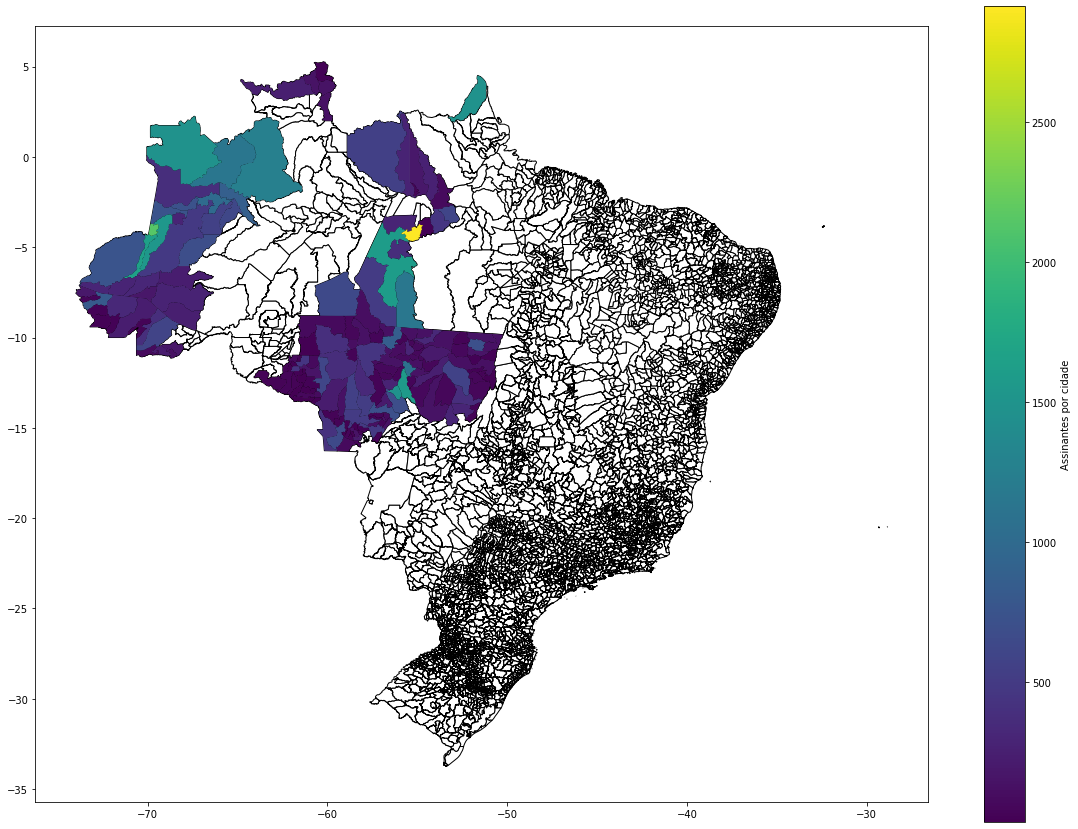

In [22]:
#base = Brazil.plot(color='white', edgecolor='black',figsize=(10,8))
Brazil_Antena_Assinantes_1 = Brazil_Antena_Assinantes[(Brazil_Antena_Assinantes.antena=='150CM') & (Brazil_Antena_Assinantes.Acessos>= 0.0)]
#Brazil.plot(color='white', edgecolor='black')
#Brazil_Antena_Assinantes_1.plot('Acessos',legend=True,legend_kwds={"label":"Assinantes por cidade"},figsize=(15,10))
base  = Brazil.plot(color='white', edgecolor='black',figsize=(20,15))
Brazil_Antena_Assinantes_1.plot('Acessos',legend=True,legend_kwds={"label":"Assinantes por cidade"},ax=base)

In [23]:
Brazil_Antena_Assinantes_1.head()

,CÓDIGO IBGE,NM_MUN,SIGLA_UF,AREA_KM2,geometry,UF,CIDADE,CIDADE-UF,Domicilios Total,População (IBGE 2017),...,75cm .1,90cm .1,150cm.1,"Menor Antena com 99,5 %",Tamanho alterado?,Unnamed: 23,Acessos,antena,grupo,nova_antena
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8...",RO,ALTA FLORESTA D'OESTE,ALTA FLORESTA D'OESTE-RO,4697.0,25437.0,...,2.028258,3.529912,7.246245,150 cm,Manteve,From 150 cm to 150 cm,46.0,150CM,2.0,150 cm
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",RO,CABIXI,CABIXI-RO,935.0,6224.0,...,1.117426,2.624410,6.365497,150 cm,Manteve,From 150 cm to 150 cm,8.0,150CM,2.0,150 cm
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2...",RO,CACOAL,CACOAL-RO,22343.0,88507.0,...,1.868100,3.370774,7.091828,150 cm,Manteve,From 150 cm to 150 cm,448.0,150CM,2.0,150 cm
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2...",RO,CEREJEIRAS,CEREJEIRAS-RO,5039.0,17934.0,...,0.915231,2.423255,6.169193,150 cm,Manteve,From 150 cm to 150 cm,58.0,150CM,2.0,150 cm
5,1100064,Colorado do Oeste,RO,1451.060,"POLYGON ((-60.72608 -13.14060, -60.72609 -13.1...",RO,COLORADO DO OESTE,COLORADO DO OESTE-RO,4736.0,18467.0,...,0.915231,2.423255,6.169193,150 cm,Manteve,From 150 cm to 150 cm,85.0,150CM,2.0,150 cm


In [24]:
Brazil_Antena_Assinantes_1=Brazil_Antena_Assinantes_1.sort_values(by=['Acessos'], ascending=False)
Brazil_Antena_Assinantes_1.head()

,CÓDIGO IBGE,NM_MUN,SIGLA_UF,AREA_KM2,geometry,UF,CIDADE,CIDADE-UF,Domicilios Total,População (IBGE 2017),...,75cm .1,90cm .1,150cm.1,"Menor Antena com 99,5 %",Tamanho alterado?,Unnamed: 23,Acessos,antena,grupo,nova_antena
254,1506195,RurÃ³polis,PA,7021.321,"POLYGON ((-55.54023 -4.15008, -55.53653 -4.151...",PA,RUROPOLIS,RUROPOLIS-PA,5216.0,49093.0,...,3.828368,5.315584,8.965706,90 cm,Mudou,From 150 cm to 90 cm,2913.0,150CM,2.0,90 cm
129,1304062,Tabatinga,AM,3266.062,"POLYGON ((-69.88346 -3.94203, -69.85861 -3.803...",AM,TABATINGA,TABATINGA-AM,10119.0,63635.0,...,1.406078,2.911494,6.645279,150 cm,Manteve,From 150 cm to 150 cm,2150.0,150CM,2.0,150 cm
83,1300607,Benjamin Constant,AM,8695.391,"POLYGON ((-70.13655 -4.38618, -70.13675 -4.381...",AM,BENJAMIN CONSTANT,BENJAMIN CONSTANT-AM,5330.0,41329.0,...,1.406078,2.911494,6.645279,150 cm,Manteve,From 150 cm to 150 cm,1653.0,150CM,2.0,150 cm
208,1503606,Itaituba,PA,62042.472,"POLYGON ((-56.32101 -4.16240, -56.31856 -4.165...",PA,ITAITUBA,ITAITUBA-PA,19366.0,98523.0,...,4.100292,5.584765,9.222444,90 cm,Mudou,From 150 cm to 90 cm,1600.0,150CM,2.0,90 cm
5309,5107925,Sorriso,MT,9347.556,"POLYGON ((-56.07220 -12.56274, -56.07232 -12.5...",MT,SORRISO,SORRISO-MT,21380.0,85223.0,...,3.495877,4.986225,8.650607,90 cm,Mudou,From 150 cm to 90 cm,1579.0,150CM,2.0,90 cm
